# Um exemplo do método de Euler aplicado a um Sistema de Equações Ordinárias

Nesta notebook vamos analisar algumas propriedades do método de Euler através de um exemplo particular: 

O PVI é  \begin{align*}
  Y_1' & = Y_1  - 2Y_2  + 4 \cos x - 2 \text{sen } x,\\
  Y_2' & = 3Y_1 - 4Y_2  + 5 \cos x - 5 \text{sen } x,\\
  Y_1 &(0)  = 1,\quad Y_2 (0) = 2.
 \end{align*} 
 
 Vamos estudar a aproximação de sua solução $Y_1 (x) = \cos x + \text{sen } x,\quad Y_2 (x) = 2 \cos x$ sobre o intervalo $[0,X]$ usando o método de Euler.

Como sempre, começaremos inicializando várias bibliotecas que precisaremos usar.

In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
import pandas as pd
#Para mostrar tabelas mais bonitas
from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Função no membro direito da equação
def f(a, b):
    return np.array([b[0]-2*b[1]+4*np.cos(a)-2*np.sin(a),3*b[0]-4*b[1]+5*np.cos(a)-5*np.sin(a)])

In [3]:
# Solução exata (vetorial)
def phi(a):
    return np.array([np.cos(a) + np.sin(a),2*np.cos(a)])

In [4]:
# Condições iniciais
x0 = 0
y0 = np.array([1,2])
#Extremo direito do intervalo
X = 6.2 

## 1. Implementação

In [5]:
#Passo do Método de Euler
def passo_Euler(x, y, f, h):
    """
    Executa uma iteração do método de Euler.
    
    Parâmetros
    ----------
    x : float.
        x_j
    y : numpy array de floats.
        y_j   
    F : function
        Função para avaliar o termo direito do sistema.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    y_novo = y + h * f(x,y)
    return y_novo 

A seguir, aplicaremos o método de Euler com 6 tamanhos de passo diferentes. 

In [6]:
# Consideramos 6 tamanhos de passo possíveis
#Usar multiplos de lista_h[0]
lista_h = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
# Lista com as malhas
lista_x = []
# Lista com as soluções aproximadas para cada malha
lista_y = []
# Lista com os erros absolutos de cada malha
erros_abs = []
#Aplicamos o método de Euler
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha 
    y = np.zeros((2,N+1))
    #y = np.arange(2*(N+1)).reshape((2,N+1)) #inicializar y    
    x[0] = x0 #x inicial
    y[:,0] = y0 #y inicial
    # N iterações do método de Euler.
    for n in range(N):
        y[:,n + 1] = passo_Euler(x[n],y[:,n],f,h) #iteração do método de Euler
    lista_x.append(x) #armazenar malha 
    lista_y.append(y)  # armazenar arranjo com as aproximações usando essa malha
    erros_abs. append(phi(x)-y) # armazenar erro global  

## 2. Erro Global

No código acima calculamos as aproximações $y_j$ em cada ponto $x_j$ da malha para diferentes valores de $ℎ$ e também calculamos o erro global $e_j=\varphi(𝑥_𝑗)−𝑦_𝑗,1 \leq 𝑗 \leq 𝑁$.

A seguir, vamos representar os resultados obtidos  uma tabela para comparar alguns valores.

In [7]:
#Erros na primeira coordenada
#Mostrar apenas 4 dígitos depois da vírgula
pd.set_option('precision',4)
#Pontos da malha cujos erros serão mostrados
x = np.linspace(lista_h[0], X, int((X-x0)/lista_h[0]))
#d: Dicionário com os dados que serão tabelados
d = {}
d[''+ '_x'] = x # Valores de x cujos erros serão exibidos
for j in range(len(lista_h)):# em cada iteração do loop, calculamos 3 colunas
    err_abs = erros_abs[j][0,int(lista_h[0]/lista_h[j]):int((X-x0)/lista_h[j]+1):int(lista_h[0]/lista_h[j])]
    d['h='+str(lista_h[j])+'_Erro Abs. '+ str(j+1)] = err_abs # coluna do erro absoluto
    d[''+'_Erro Rel. '+ str(j+1)] = err_abs/phi(lista_x[j][int(lista_h[0]/lista_h[j]):int((X-x0)/lista_h[j]+1):\
                                                       int(lista_h[0]/lista_h[j])])[0,:]# coluna do erro relativo
df = pd.DataFrame(data=d) # Formação da tabela
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
df.style.set_properties(**{'text-align': 'left'}) #Alinhamento à esquerda nas colunas
HTML(df.to_html(index=False)) # Tirar a coluna de índices

,h=0.2,,h=0.1,,h=0.05,,h=0.01,,h=0.005,,h=0.001,
x,Erro Abs. 1,Erro Rel. 1,Erro Abs. 2,Erro Rel. 2,Erro Abs. 3,Erro Rel. 3,Erro Abs. 4,Erro Rel. 4,Erro Abs. 5,Erro Rel. 5,Erro Abs. 6,Erro Rel. 6
0.2,-0.0213,-0.0180,-0.0093,-0.0079,-0.0044,-0.0037,-0.0008,-0.0007,-0.0004,-0.0004,-8.4187e-05,-7.1421e-05
0.4,-0.0341,-0.0260,-0.0158,-0.0121,-0.0077,-0.0058,-0.0015,-0.0011,-0.0007,-0.0006,-1.4920e-04,-1.1385e-04
0.6,-0.0440,-0.0317,-0.0213,-0.0153,-0.0105,-0.0076,-0.0021,-0.0015,-0.0010,-0.0007,-2.0740e-04,-1.4921e-04
0.8,-0.0537,-0.0380,-0.0267,-0.0189,-0.0133,-0.0094,-0.0026,-0.0019,-0.0013,-0.0009,-2.6473e-04,-1.8722e-04
1.0,-0.0640,-0.0463,-0.0322,-0.0233,-0.0161,-0.0117,-0.0032,-0.0023,-0.0016,-0.0012,-3.2299e-04,-2.3375e-04
1.2,-0.0750,-0.0580,-0.0379,-0.0293,-0.0190,-0.0147,-0.0038,-0.0029,-0.0019,-0.0015,-3.8142e-04,-2.9467e-04
1.4,-0.0862,-0.0746,-0.0435,-0.0377,-0.0218,-0.0189,-0.0044,-0.0038,-0.0022,-0.0019,-4.3774e-04,-3.7886e-04
1.6,-0.0968,-0.0998,-0.0487,-0.0502,-0.0244,-0.0252,-0.0049,-0.0050,-0.0024,-0.0025,-4.8898e-04,-5.0391e-04
1.8,-0.1061,-0.1421,-0.0532,-0.0712,-0.0266,-0.0356,-0.0053,-0.0071,-0.0027,-0.0036,-5.3194e-04,-7.1244e-04


In [8]:
#Erros na segunda coordenada
#Mostrar apenas 4 dígitos depois da vírgula
pd.set_option('precision',4)
#Pontos da malha cujos erros serão mostrados
x = np.linspace(lista_h[0], X, int((X-x0)/lista_h[0]))
#d: Dicionário com os dados que serão tabelados
d = {}
d[''+ '_x'] = x # Valores de x cujos erros serão exibidos
for j in range(len(lista_h)):# em cada iteração do loop, calculamos 3 colunas
    err_abs = erros_abs[j][1,int(lista_h[0]/lista_h[j]):int((X-x0)/lista_h[j]+1):int(lista_h[0]/lista_h[j])]
    d['h='+str(lista_h[j])+'_Erro Abs. '+ str(j+1)] = err_abs # coluna do erro absoluto
    d[''+'_Erro Rel. '+ str(j+1)] = err_abs/phi(lista_x[j][int(lista_h[0]/lista_h[j]):int((X-x0)/lista_h[j]+1):\
                                                       int(lista_h[0]/lista_h[j])])[1,:]# coluna do erro relativo
df = pd.DataFrame(data=d) # Formação da tabela
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
df.style.set_properties(**{'text-align': 'left'}) #Alinhamento à esquerda nas colunas
HTML(df.to_html(index=False)) # Tirar a coluna de índices

,h=0.2,,h=0.1,,h=0.05,,h=0.01,,h=0.005,,h=0.001,
x,Erro Abs. 1,Erro Rel. 1,Erro Abs. 2,Erro Rel. 2,Erro Abs. 3,Erro Rel. 3,Erro Abs. 4,Erro Rel. 4,Erro Abs. 5,Erro Rel. 5,Erro Abs. 6,Erro Rel. 6
0.2,-0.0399,-0.0203,-0.0175,-0.0089,-0.0083,-0.0042,-0.0016,-0.0008,-0.0008,-4.0281e-04,-1.5732e-04,-8.0259e-05
0.4,-0.0593,-0.0322,-0.0271,-0.0147,-0.0130,-0.0071,-0.0025,-0.0014,-0.0013,-6.8544e-04,-2.5187e-04,-1.3673e-04
0.6,-0.0680,-0.0412,-0.0322,-0.0195,-0.0157,-0.0095,-0.0031,-0.0019,-0.0015,-9.3527e-04,-3.0826e-04,-1.8675e-04
0.8,-0.0714,-0.0513,-0.0349,-0.0250,-0.0173,-0.0124,-0.0034,-0.0025,-0.0017,-1.2264e-03,-3.4149e-04,-2.4508e-04
1.0,-0.0724,-0.0670,-0.0362,-0.0335,-0.0181,-0.0167,-0.0036,-0.0033,-0.0018,-1.6677e-03,-3.6036e-04,-3.3348e-04
1.2,-0.0722,-0.0996,-0.0366,-0.0506,-0.0184,-0.0254,-0.0037,-0.0051,-0.0018,-2.5499e-03,-3.6969e-04,-5.1012e-04
1.4,-0.0714,-0.2101,-0.0366,-0.1076,-0.0185,-0.0543,-0.0037,-0.0109,-0.0019,-5.4672e-03,-3.7191e-04,-1.0941e-03
1.6,-0.0702,1.2015,-0.0361,0.6175,-0.0182,0.3121,-0.0037,0.0629,-0.0018,3.1483e-02,-3.6798e-04,6.3011e-03
1.8,-0.0683,0.1503,-0.0351,0.0772,-0.0177,0.0390,-0.0036,0.0079,-0.0018,3.9377e-03,-3.5813e-04,7.8813e-04


## 3. Gráficos das coordenadas da solução

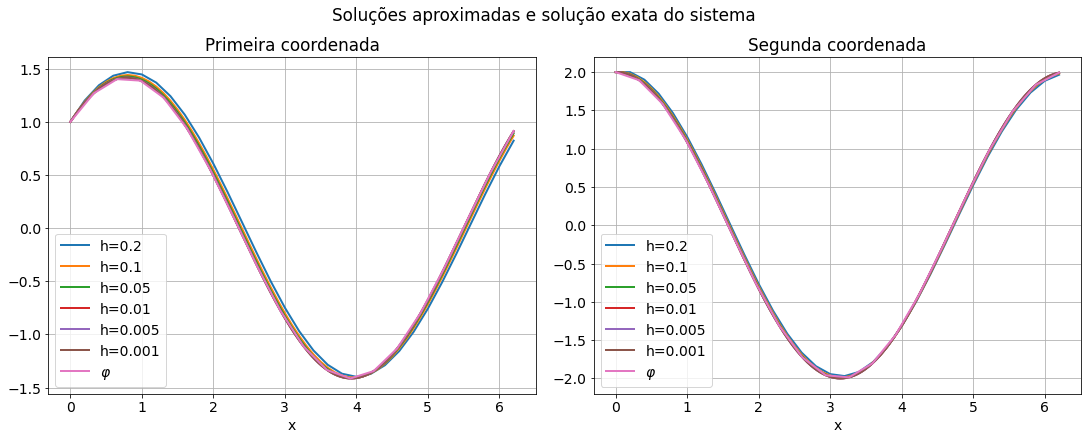

In [9]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem das coordenadas da solução exata junto com as aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
# x para plotar a sol. exata
x = np.linspace(x0, X, 20)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Soluções aproximadas e solução exata do sistema')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('Primeira coordenada')
axs[0].set_xlabel('x') 
axs[0].grid(True)
for j in range(len(lista_h)):
    axs[0].plot(lista_x[j], lista_y[j][0,:], linestyle='-', linewidth=2,label='h='+str(lista_h[j])) 
axs[0].plot(x, phi(x)[0,:], linestyle='-', linewidth=2,label=r'$\varphi$')    
axs[0].legend()
axs[1].set_title('Segunda coordenada')
axs[1].set_xlabel('x') 
axs[1].grid(True)
for j in range(len(lista_h)):
    axs[1].plot(lista_x[j], lista_y[j][1,:], linestyle='-', linewidth=2,label='h='+str(lista_h[j])) 
axs[1].plot(x, phi(x)[1,:], linestyle='-', linewidth=2,label=r'$\varphi$') 
axs[1].legend()

## 4. Erros
### 4.1 Escala Linear

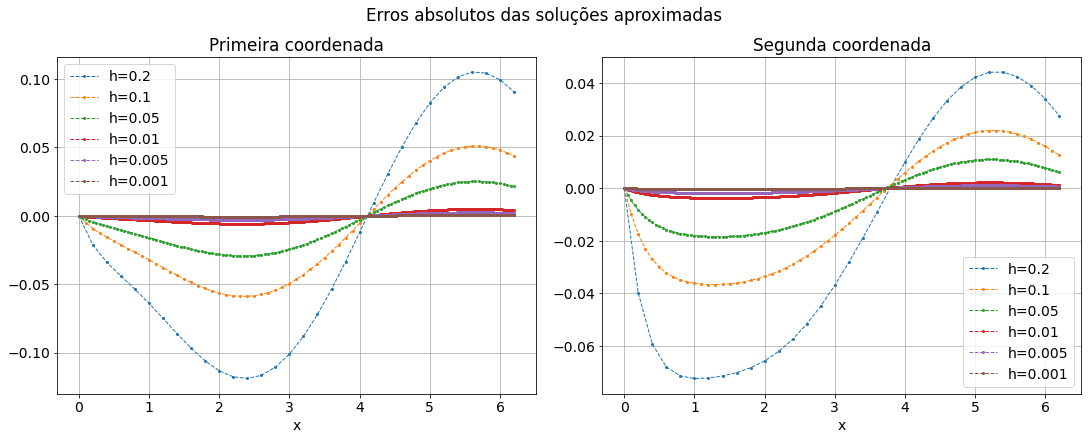

In [10]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem dos erros absolutos das coordenadas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Erros absolutos das soluções aproximadas')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('Primeira coordenada')
axs[0].set_xlabel('x') 
axs[0].grid(True)
for j in range(len(lista_h)):
    axs[0].plot(lista_x[j], erros_abs[j][0,:], label='h='+str(lista_h[j]), 
                marker='o', linewidth=1, linestyle='--', markersize=2)    
axs[0].legend()
axs[1].set_title('Segunda coordenada')
axs[1].set_xlabel('x') 
axs[1].grid(True)
for j in range(len(lista_h)):
    axs[1].plot(lista_x[j], erros_abs[j][1,:], label='h='+str(lista_h[j]), 
                marker='o', linewidth=1, linestyle='--', markersize=2) 
axs[1].legend()

### 4.2 Escala Logarítmica

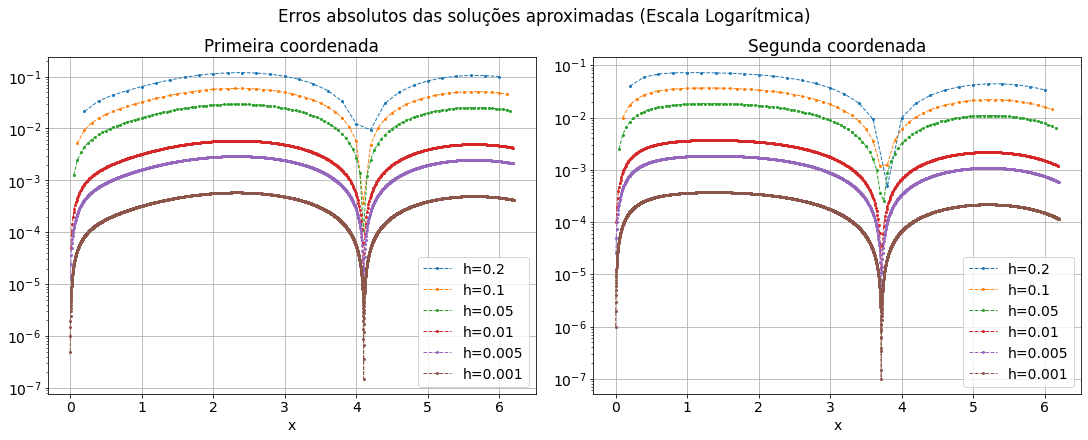

In [11]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem dos erros absolutos das coordenadas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Erros absolutos das soluções aproximadas (Escala Logarítmica)')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('Primeira coordenada')
axs[0].set_xlabel('x') 
axs[0].grid(True)
for j in range(len(lista_h)):
    axs[0].plot(lista_x[j][1:-1], abs(erros_abs[j][0,1:-1]), label='h='+str(lista_h[j]), 
                marker='o', linewidth=1, linestyle='--', markersize=2)    
axs[0].semilogy()
axs[0].legend()
axs[1].set_title('Segunda coordenada')
axs[1].set_xlabel('x') 
axs[1].grid(True)
for j in range(len(lista_h)):
    axs[1].plot(lista_x[j][1:-1], abs(erros_abs[j][1,1:-1]), label='h='+str(lista_h[j]), 
                marker='o', linewidth=1, linestyle='--', markersize=2) 
axs[1].semilogy()
axs[1].legend()

## 5. Conclusão

Desde o ponto de vista da implementação, a aplicação de métodos numéricos aos sistemas não é muito diferente da aplicação a equações.